# The objective is to predict whether a tweet is real or fake.

In [183]:
#Importing libraties

In [184]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import re, string
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [185]:
# Reading the data

df = pd.read_csv("fake_tweets.csv")

In [186]:
df.head()

,Unnamed: 0,text,target
0,0,'I can't have kids cuz I got in a bicycle acci...,real
1,1,@1acd4900c1424d1 @FoxNews no one is rioting bu...,fake
2,2,@luke_winkie Whoever is directing these videos...,real
3,3,The Opposite of Love is Fear HereÂÃÂªs Why\n...,fake
4,4,China's Stock Market Crash: Are There Gems In ...,fake


In [187]:
#dropping the unnamed column
df.drop('Unnamed: 0', axis =1, inplace=True)

In [188]:
#getting the shape of data
df.shape

(7613, 2)

In [189]:
# checking null values:

df.isnull().sum()

text      0
target    0
dtype: int64

In [190]:
#getting information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7613 non-null   object
 1   target  7613 non-null   object
dtypes: object(2)
memory usage: 119.1+ KB


<Axes: >

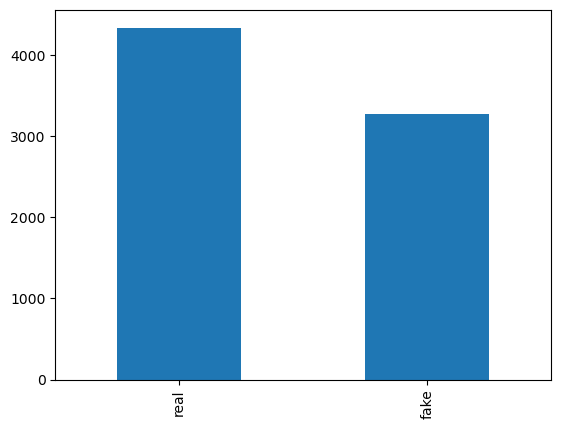

In [191]:
#Checking count:

df['target'].value_counts().plot(kind='bar')

**Lowercasing**

In [192]:
df['text'] = df['text'].str.lower()

In [193]:
df.head()

,text,target
0,'i can't have kids cuz i got in a bicycle acci...,real
1,@1acd4900c1424d1 @foxnews no one is rioting bu...,fake
2,@luke_winkie whoever is directing these videos...,real
3,the opposite of love is fear hereâãâªs why\n...,fake
4,china's stock market crash: are there gems in ...,fake


In [194]:
#Removing non-standard text

In [195]:
def remove_non_ascii(text):
    return re.sub(r'[^\x00-\x7F]', '', text)

In [196]:
df['text'] = df['text'].apply(remove_non_ascii)

In [197]:
df.head()

,text,target
0,'i can't have kids cuz i got in a bicycle acci...,real
1,@1acd4900c1424d1 @foxnews no one is rioting bu...,fake
2,@luke_winkie whoever is directing these videos...,real
3,the opposite of love is fear heres why\nhttp:/...,fake
4,china's stock market crash: are there gems in ...,fake


**Removing Stop words**

In [198]:
stop_words = stopwords.words('english')

In [199]:
# creating a function to remove stopwords:

def remove_stopwords(txt):
    txt = ' '.join(word for word in txt.split(' ') if word not in stop_words)
    return txt  

In [200]:
df['text'] = df['text'].apply(remove_stopwords)

In [201]:
df.head()

,text,target
0,'i can't kids cuz got bicycle accident &amp; s...,real
1,@1acd4900c1424d1 @foxnews one rioting burning ...,fake
2,@luke_winkie whoever directing videos needs gr...,real
3,opposite love fear heres why\nhttp://t.co/r5bx...,fake
4,china's stock market crash: gems rubble? http:...,fake


**Using Regular Expressions**

In [202]:
def clean_text(text):
    text = str(text).lower() 
    text = re.sub('\[.*?\]', '', text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) 
    text = re.sub('\n', '', text) 
    text = re.sub('\w*\d\w*', '', text) 
    return text

In [203]:
df['text'] = df['text'].apply(clean_text)

In [204]:
df.head()

,text,target
0,i cant kids cuz got bicycle accident amp split...,real
1,foxnews one rioting burning buildings looting,fake
2,lukewinkie whoever directing videos needs grab...,real
3,opposite love fear heres why,fake
4,chinas stock market crash gems rubble forbesasia,fake


**Encoding target column**

In [205]:
df['target'].replace({"real":1,"fake":0},inplace=True)

In [206]:
df.head()

,text,target
0,i cant kids cuz got bicycle accident amp split...,1
1,foxnews one rioting burning buildings looting,0
2,lukewinkie whoever directing videos needs grab...,1
3,opposite love fear heres why,0
4,chinas stock market crash gems rubble forbesasia,0


In [207]:
df.reset_index (inplace = True)

In [208]:
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500, min_font_size = 10, background_color='black')

# REAL

In [209]:
spam_wordcloud = wc.generate(df[df['target']==1]['text'].str.cat(sep=" "))

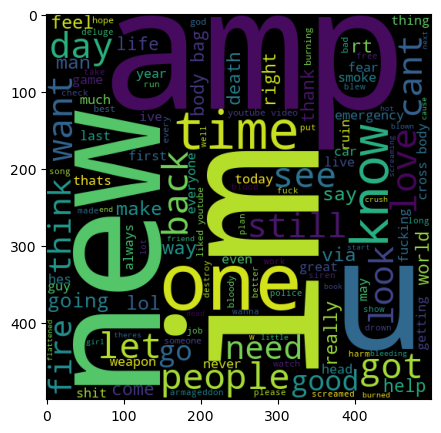

In [210]:
plt.figure(figsize=(14,5))
plt.imshow(spam_wordcloud)

Most common words : new, amp, time, one, know, people

# FAKE

In [211]:
ham_wordcloud = wc.generate(df[df['target']==0]['text'].str.cat(sep=" "))

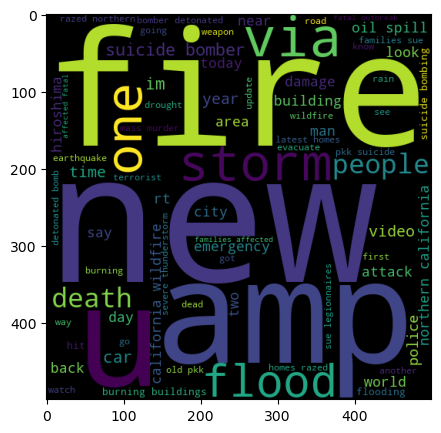

In [213]:
plt.figure(figsize=(14,5))
plt.imshow(ham_wordcloud)

most common words : fire, new, amp, flood, storm, people

In [214]:
#Removing puntuations

import string
exclude = string.punctuation
print(exclude)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [215]:
def remove_punctuation(text):
    return text.translate (str.maketrans(" ",' ', exclude))

In [216]:
df['text'] = df['text'].apply(remove_punctuation)

In [217]:
df['text']

0       i cant kids cuz got bicycle accident amp split...
1           foxnews one rioting burning buildings looting
2       lukewinkie whoever directing videos needs grab...
3                            opposite love fear heres why
4       chinas stock market crash gems rubble  forbesasia
                              ...                        
7608    lonepine remembered around australia descendan...
7609    mmmmmm im burning im burning buildings im buil...
7610                                day disaster emotions
7611    cum explosionbegforcum alldaycumshots cumcover...
7612                                     villicanaalicia 
Name: text, Length: 7613, dtype: object

**Splitting into train and test**

In [218]:
y = df['target']
X = df['text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Count Vectorizer

In [222]:
cvect = CountVectorizer()
X_traint = cvect.fit_transform(X_train)
X_testt = cvect.transform(X_test)

In [223]:
X_traint = X_traint.astype(np.float32)
X_testt = X_testt.astype(np.float32)

In [224]:
X_traint.shape

(5329, 13122)

# NAIVE BAYES

In [231]:
mnb = MultinomialNB()
mnb.fit(X_traint, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train Set
y_train_pred = mnb.predict(X_traint)

print('Accuracy score - Train: ', accuracy_score(y_train, y_train_pred))
print('Precision:', precision_score(y_train, y_train_pred))
print('Recall:', recall_score(y_train, y_train_pred))
print('F1-score:', f1_score(y_train, y_train_pred))

# Calculate AUROC for the training set
y_train_prob = mnb.predict_proba(X_traint)[:, 1]  
auroc_train = roc_auc_score(y_train, y_train_prob)
print('AUROC - Train:', auroc_train)

print('-----------------------------------------------------------------------------------------------------------------')

# Test Set
y_test_pred = mnb.predict(X_testt)

print('Accuracy score - Test: ', accuracy_score(y_test, y_test_pred))
print('Precision:', precision_score(y_test, y_test_pred))
print('Recall:', recall_score(y_test, y_test_pred))
print('F1-score:', f1_score(y_test, y_test_pred))

# Calculate AUROC for the test set
y_test_prob = mnb.predict_proba(X_testt)[:, 1]  
auroc_test = roc_auc_score(y_test, y_test_prob)
print('AUROC - Test:', auroc_test)

Accuracy score - Train:  0.922124225933571
Precision: 0.914079648792725
Recall: 0.9538612565445026
F1-score: 0.9335468374699759
AUROC - Train: 0.9699805133331645
-----------------------------------------------------------------------------------------------------------------
Accuracy score - Test:  0.7937828371278459
Precision: 0.794649313087491
Recall: 0.854587869362364
F1-score: 0.8235294117647058
AUROC - Test: 0.8502861087649638


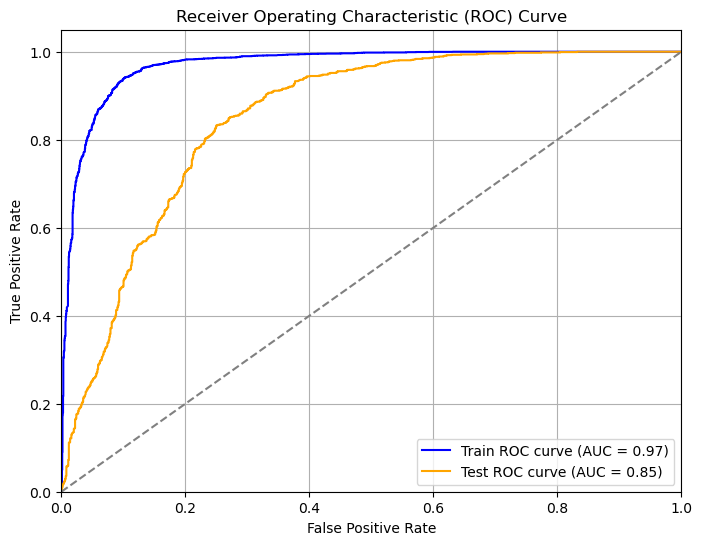

In [232]:
# Calculate the ROC curve for both train and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

# Calculate the area under the ROC curve (AUC) for both train and test sets
auc_train = roc_auc_score(y_train, y_train_prob)
auc_test = roc_auc_score(y_test, y_test_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='orange', label=f'Test ROC curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Tuning

In [234]:
from sklearn.metrics import auc

Alpha: 0.01
Accuracy score - Test:  0.7727670753064798
Precision: 0.7817781043350478
Recall: 0.8273716951788491
F1-score: 0.8039289761994711
AUROC - Test: 0.8223538835057361

Alpha: 0.02
Accuracy score - Test:  0.7762697022767076
Precision: 0.7855563743551953
Recall: 0.8289269051321928
F1-score: 0.8066590995081345
AUROC - Test: 0.8266899272884805

Alpha: 0.03
Accuracy score - Test:  0.7788966725043783
Precision: 0.7881918819188192
Recall: 0.8304821150855366
F1-score: 0.8087845513063233
AUROC - Test: 0.8293714177967131

Alpha: 0.05
Accuracy score - Test:  0.781523642732049
Precision: 0.7887013939838592
Recall: 0.8359253499222395
F1-score: 0.8116270290675727
AUROC - Test: 0.8329734897477693

Alpha: 0.1
Accuracy score - Test:  0.7837127845884413
Precision: 0.7903225806451613
Recall: 0.838258164852255
F1-score: 0.8135849056603773
AUROC - Test: 0.8379102684373412

Alpha: 0.2
Accuracy score - Test:  0.7933450087565674
Precision: 0.7970802919708029
Recall: 0.8491446345256609
F1-score: 0.82228

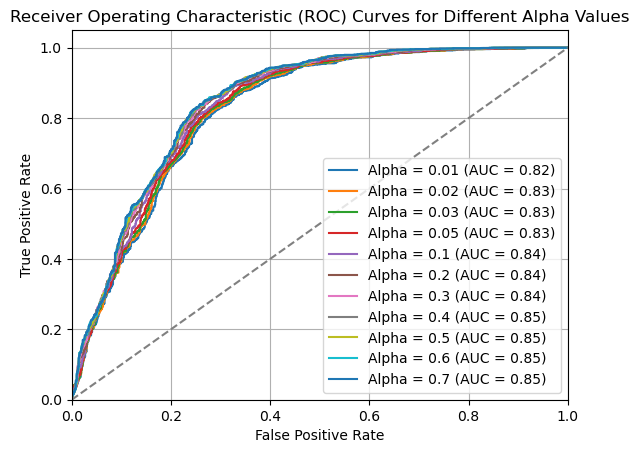

In [235]:
alphas = [.01, .02, .03, .05, .1, .2, .3, .4, .5, .6, .7]

for alpha in alphas:
    mnb = MultinomialNB(alpha=alpha)
    mnb.fit(X_traint, y_train)
    y_test_pred = mnb.predict(X_testt)
    
    print('Alpha:', alpha)
    print('Accuracy score - Test: ', accuracy_score(y_test, y_test_pred))
    print('Precision:', precision_score(y_test, y_test_pred))
    print('Recall:', recall_score(y_test, y_test_pred))
    print('F1-score:', f1_score(y_test, y_test_pred))
    
    # Calculate AUROC for the test set
    y_test_prob = mnb.predict_proba(X_testt)[:, 1]  # Probability of the positive class (class 1)
    auroc_test = roc_auc_score(y_test, y_test_prob)
    print('AUROC - Test:', auroc_test)
    print()
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Alpha = {alpha} (AUC = {auc_score:.2f})')
    
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves for Different Alpha Values')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Alpha = 0.5 givesd us the best accuracy of 0.797

# DECISION TREE 

In [236]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Train the Decision Tree model
dt.fit(X_traint, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train Set
y_train_pred = dt.predict(X_traint)

print('Accuracy score - Train: ', accuracy_score(y_train, y_train_pred))
print('Precision:', precision_score(y_train, y_train_pred))
print('Recall:', recall_score(y_train, y_train_pred))
print('F1-score:', f1_score(y_train, y_train_pred))

# Calculate AUROC for the training set
y_train_prob = dt.predict_proba(X_traint)[:, 1]  
auroc_train = roc_auc_score(y_train, y_train_prob)
print('AUROC - Train:', auroc_train)

print('-----------------------------------------------------------------------------------------------------------------')

# Test Set
y_test_pred = dt.predict(X_testt)

print('Accuracy score - Test: ', accuracy_score(y_test, y_test_pred))
print('Precision:', precision_score(y_test, y_test_pred))
print('Recall:', recall_score(y_test, y_test_pred))
print('F1-score:', f1_score(y_test, y_test_pred))

# Calculate AUROC for the test set
y_test_prob = dt.predict_proba(X_testt)[:, 1]  
auroc_test = roc_auc_score(y_test, y_test_prob)
print('AUROC - Test:', auroc_test)

Accuracy score - Train:  0.9878025896040533
Precision: 0.991779020059191
Recall: 0.9869109947643979
F1-score: 0.9893390191897655
AUROC - Train: 0.9996466458056447
-----------------------------------------------------------------------------------------------------------------
Accuracy score - Test:  0.7469352014010507
Precision: 0.7572674418604651
Recall: 0.8102643856920684
F1-score: 0.782870022539444
AUROC - Test: 0.7416345131943514


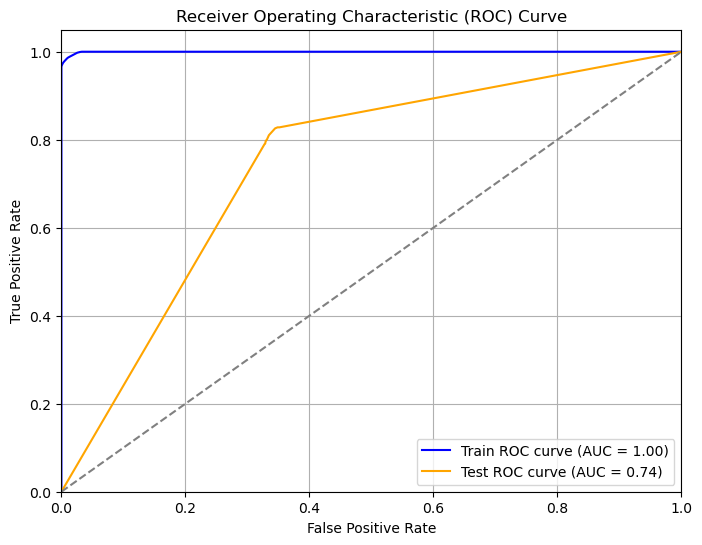

In [237]:
# Calculate the ROC curve for both train and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

# Calculate the area under the ROC curve (AUC) for both train and test sets
auc_train = roc_auc_score(y_train, y_train_prob)
auc_test = roc_auc_score(y_test, y_test_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='orange', label=f'Test ROC curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)

# HYPERPARAMETER TUNING

In [238]:
from sklearn.model_selection import RandomizedSearchCV

# Creating a Decision Tree classifier
dt = DecisionTreeClassifier()

# Defining the hyperparameter search space
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=10, scoring='roc_auc', cv=5, n_jobs=-1, random_state=42)

# Train the RandomizedSearchCV on your data
random_search.fit(X_traint, y_train)

# Get the best hyperparameters found by RandomizedSearchCV
best_params = random_search.best_params_

# Create a Decision Tree classifier with the best hyperparameters
dt_best = DecisionTreeClassifier(**best_params)

# Train the Decision Tree model with the best hyperparameters
dt_best.fit(X_traint, y_train)

# Make predictions on the train set
y_train_pred = dt_best.predict(X_traint)

print('Accuracy score - Train: ', accuracy_score(y_train, y_train_pred))
print('Precision:', precision_score(y_train, y_train_pred))
print('Recall:', recall_score(y_train, y_train_pred))
print('F1-score:', f1_score(y_train, y_train_pred))

# Calculate AUROC for the training set
y_train_prob = dt_best.predict_proba(X_traint)[:, 1]  
auroc_train = roc_auc_score(y_train, y_train_prob)
print('AUROC - Train:', auroc_train)

print('-----------------------------------------------------------------------------------------------------------------')

# Make predictions on the test set
y_test_pred = dt_best.predict(X_testt)

print('Accuracy score - Test: ', accuracy_score(y_test, y_test_pred))
print('Precision:', precision_score(y_test, y_test_pred))
print('Recall:', recall_score(y_test, y_test_pred))
print('F1-score:', f1_score(y_test, y_test_pred))

# Calculate AUROC for the test set
y_test_prob = dt_best.predict_proba(X_testt)[:, 1]  
auroc_test = roc_auc_score(y_test, y_test_prob)
print('AUROC - Test:', auroc_test)

Accuracy score - Train:  0.8215425032839182
Precision: 0.8467874794069192
Recall: 0.8409685863874345
F1-score: 0.8438680019701199
AUROC - Train: 0.9128537428911673
-----------------------------------------------------------------------------------------------------------------
Accuracy score - Test:  0.7583187390542907
Precision: 0.7805810397553516
Recall: 0.7939346811819595
F1-score: 0.7872012336160371
AUROC - Test: 0.8144075865572513


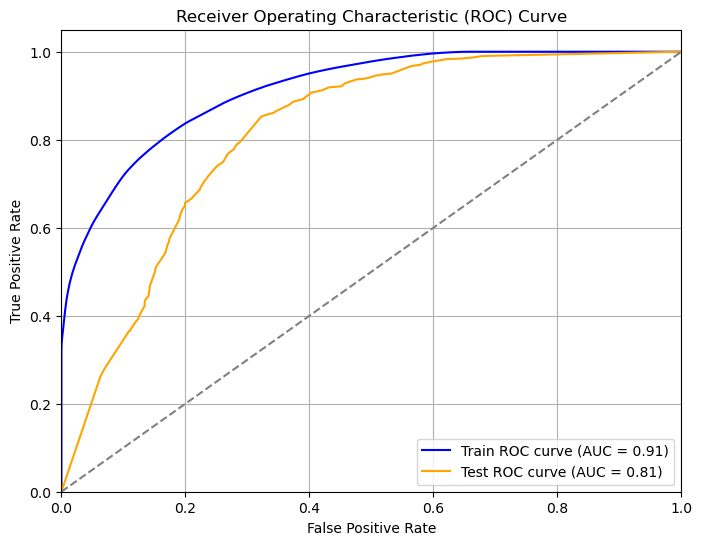

In [239]:
# Calculate the ROC curve for both train and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

# Calculate the area under the ROC curve (AUC) for both train and test sets
auc_train = roc_auc_score(y_train, y_train_prob)
auc_test = roc_auc_score(y_test, y_test_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='orange', label=f'Test ROC curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Logistic Regression

In [241]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression classifier
lr = LogisticRegression()

# Train the Logistic Regression model
lr.fit(X_traint, y_train)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train Set
y_train_pred = lr.predict(X_traint)

print('Accuracy score - Train: ', accuracy_score(y_train, y_train_pred))
print('Precision:', precision_score(y_train, y_train_pred))
print('Recall:', recall_score(y_train, y_train_pred))
print('F1-score:', f1_score(y_train, y_train_pred))

# Calculate AUROC for the training set
y_train_prob = lr.predict_proba(X_traint)[:, 1]  
auroc_train = roc_auc_score(y_train, y_train_prob)
print('AUROC - Train:', auroc_train)

print('-----------------------------------------------------------------------------------------------------------------')

# Test Set
y_test_pred = lr.predict(X_testt)

print('Accuracy score - Test: ', accuracy_score(y_test, y_test_pred))
print('Precision:', precision_score(y_test, y_test_pred))
print('Recall:', recall_score(y_test, y_test_pred))
print('F1-score:', f1_score(y_test, y_test_pred))

# Calculate AUROC for the test set
y_test_prob = lr.predict_proba(X_testt)[:, 1]  
auroc_test = roc_auc_score(y_test, y_test_prob)
print('AUROC - Test:', auroc_test)

Accuracy score - Train:  0.9645336836179396
Precision: 0.9520655944497004
Recall: 0.987892670157068
F1-score: 0.9696483057652161
AUROC - Train: 0.9950041662539763
-----------------------------------------------------------------------------------------------------------------
Accuracy score - Test:  0.7950963222416813
Precision: 0.7884344146685472
Recall: 0.8693623639191291
F1-score: 0.826923076923077
AUROC - Test: 0.8525593177022786


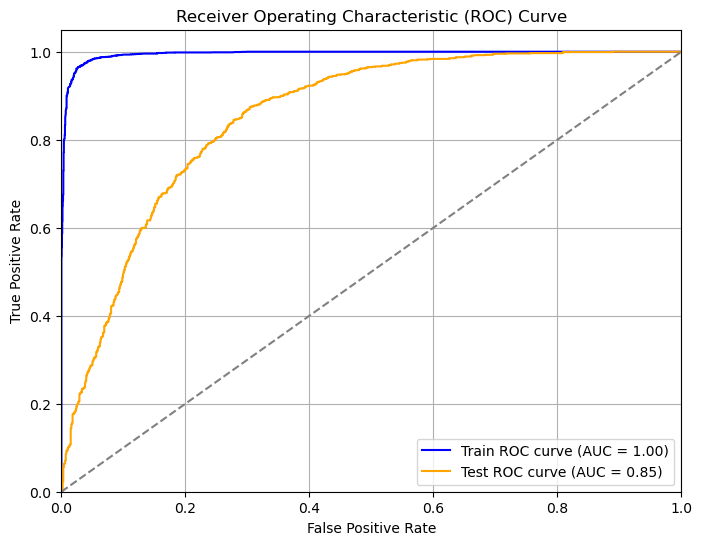

In [242]:
# Calculate the ROC curve for both train and test sets
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

# Calculate the area under the ROC curve (AUC) for both train and test sets
auc_train = roc_auc_score(y_train, y_train_prob)
auc_test = roc_auc_score(y_test, y_test_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='blue', label=f'Train ROC curve (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='orange', label=f'Test ROC curve (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [244]:
pd.DataFrame({'Models':['NaiveBayes','Decision-Tree','Logistic Regression','Tuned_nb','Tuned_dt'],
              'Train_Accuracy':[0.922,0.987,0.964, 0.781,0.821],
              'Test_Accuracy':[0.793, 0.746, 0.795, 0.797, 0.758],
              'Train_AUC-SCORE':[0.96,0.99,0.995,0.781,0.91],
              'Test_AUC-SCORE':[0.85, 0.74, 0.85, 0.84, 0.81],
             })

,Models,Train_Accuracy,Test_Accuracy,Train_AUC-SCORE,Test_AUC-SCORE
0,NaiveBayes,0.922,0.793,0.960,0.85
1,Decision-Tree,0.987,0.746,0.990,0.74
2,Logistic Regression,0.964,0.795,0.995,0.85
3,Tuned_nb,0.781,0.797,0.781,0.84
4,Tuned_dt,0.821,0.758,0.910,0.81


Navie bayes after it's tuned with alpha = 0.5 gives us the best Accuracy of 0.797